# Can pymc3 easily use the distributions from scipy as additional dists?

In [2]:
import pymc3 as pm
import numpy as np
import scipy
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from spacepy import toolbox as tb

sns.set(font_scale=1.5)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## There is an interpolated that can do it
slow?

/home/balarsen/miniconda3/envs/python3/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

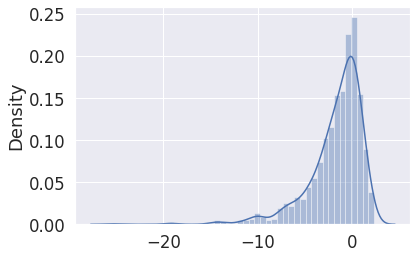

In [10]:
sns.distplot(scipy.stats.crystalball(beta=0.4, m=20).rvs(size=1000))

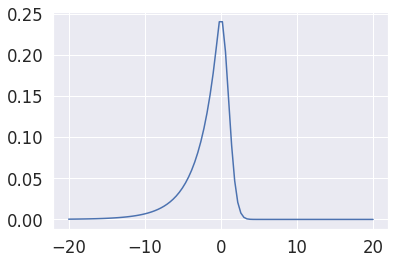

In [12]:
X = np.linspace(-20, 20, 100)
Y = scipy.stats.crystalball(beta=0.4, m=20).pdf(X)
plt.plot(X, Y)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [crystalball]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 12 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6541521856526867, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8926571838018345, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
/tmp/ipykernel_1637/3218017528.py:5: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace);


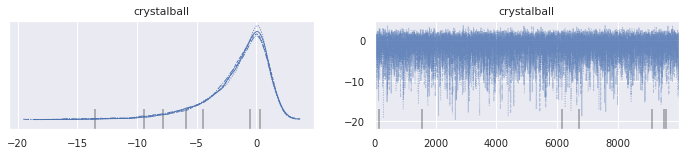

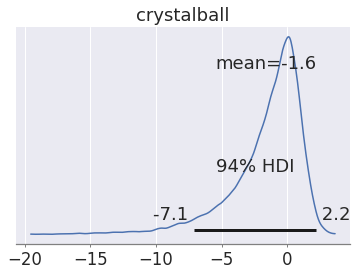

In [17]:
with pm.Model() as model:
    cb = pm.Interpolated('crystalball', X, Y)
    trace = pm.sample(10000, return_inferencedata=True)
    
    pm.traceplot(trace);
    pm.plot_posterior(trace)